# NLP
Natural language processing (NLP) is the ability of a computer program to understand human language as it is spoken.<br>
The development of NLP applications is challenging because computers traditionally require humans to "speak" to them in a programming language that is precise, unambiguous and highly structured, or through a limited number of clearly enunciated voice commands. Human speech, however, is not always precise -- it is often ambiguous and the linguistic structure can depend on many complex variables, including slang, regional dialects and social context.

# Dataset
This is a dataset taken from a paper from group to individual labels using deep features. This contains 1000 reviews and for each of the review, we have the real results as 0 or 1.<br>
0=Negative review, 1=Positive Review

# Problem Statement
We need to find how text in dataset is related with negative or positive reviews.There is no numerical data so, we cannot directly draw correlation plot. Therefore, we need to see how text is related to review and how customers rate, what are those words that express satisfaction of customers, how could we use this to predict review results of future value. Hence we need to prepare a model using Natural language processing (NLP)

## Importing the libraries

In [1]:
import pandas as pd
import numpy as np
from IPython import get_ipython
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib.pyplot as plt
%matplotlib inline
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re
from sklearn import metrics
import warnings
warnings.filterwarnings('ignore')

In [2]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


## Importing Dataset

In [3]:
dataset = pd.read_csv('Restaurant_Reviews.tsv', delimiter='\t', quoting=3)
dataset.head()

,Review,Liked
0,Wow... Loved this place.,1
1,Crust is not good.,0
2,Not tasty and the texture was just nasty.,0
3,Stopped by during the late May bank holiday of...,1
4,The selection on the menu was great and so wer...,1


In [4]:
dataset.shape

(1000, 2)

In [5]:
dataset.groupby('Liked').describe()

Review                                               
       count unique                                top freq
Liked                                                      
0        500    497  I would not recommend this place.    2
1        500    499                 I love this place.    2

## 1. Cleaning text

In [6]:
import re

**A regular expression is a special sequence of characters that helps you match or find other strings or sets of strings, using a specialized syntax held in a pattern.**

In [7]:
dataset['Review'][0] # checking 1st review

'Wow... Loved this place.'

In [8]:
review=re.sub('[^a-zA-z]',' ' , dataset['Review'][0])
review

'Wow    Loved this place '

### Punctuation

In [9]:
import string
review = re.sub('[%s]' % re.escape(string.punctuation), '', dataset['Review'][0])
review

'Wow Loved this place'

**1st sub is used to remove all numbers, comma, additional letter except letter/^ shows except sign<br>
2nd we need to make space bet these text points<br>
3rd we want to work on 1st review at 0 column<br>**

### Convert in lower case

In [10]:
review= review.lower()
review

'wow loved this place'

In [11]:
type(review)

str

## 2. Splitting words

In [12]:
review = review.split()

In [13]:
type(review)

list

Notice how review from string has changed to list

### Stopwords: Removing extra words
Correlation of review liked and word love. But word "this" and  "place" does not add any value in our sentence

In [14]:
import nltk
#nltk.download('stopwords')

In [15]:
import nltk
from nltk.corpus import stopwords
review= [word for word in review if not word in set(stopwords.words('english'))]

In [16]:
review

['wow', 'loved', 'place']

### Stemming

We need root of word i.e love. Past or future forms of verb i.e Loved or will love wont make any difference

In [17]:
from nltk.stem.porter import PorterStemmer
ps=PorterStemmer()
review= [ps.stem(word) for word in review if not word in set(stopwords.words('english'))]

In [18]:
review

['wow', 'love', 'place']

### Change list back to string

In [19]:
review= ' '.join(review)
review

'wow love place'

In [20]:
type(review)

str

### Cleaning whole dataframe
Now we need all 1000 index of our dataframe. so we need to apply for loop

In [21]:
corpus = [] # defining corpus
for i in range(0, len(dataset['Review'])): # giving range of values from 0 to 1000
    review = re.sub('[^a-zA-Z]', ' ', dataset['Review'][i]) # using i for all values instead of 1 column
    review = re.sub('[%s]' % re.escape(string.punctuation), '', dataset['Review'][i])
    review = review.lower()
    review = review.split()
    ps = PorterStemmer()
    stopword_set = set(stopwords.words('english'))
    review = [ps.stem(word) for word in review if not word in stopword_set]
    review = ' '.join(review)
    corpus.append(review) # finally attach all these cleaned values to corpus directory 

## 3. Count Vector 

In [22]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features=1500) # Remove irrelavant words like nouns "ricksteve" in dataset
# 1500 comes from amount of words our sparse matrix has converted to. We had 1565 columns.
#So we took 1500 for safe assumption that we get rid of useless words.
X = cv.fit_transform(corpus).toarray() # X is used as matrix of feature to be coverted as spare matrix
# .array is used to created corpus i.e list into matrix. Each word is in its own columnn

In [23]:
X

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [24]:
y = dataset.Liked # y is series now
y=dataset.Liked.values # y is integer now

In [25]:
type(y)

numpy.ndarray

In [26]:
y

array([1, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1,
       1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0,
       0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1,
       0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1,

## Splitting the dataset into the Training set and Test set

In [27]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

## Fitting classifier to the Training set

In [28]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)

GaussianNB(priors=None)

In [29]:
y_pred = classifier.predict(X_test)
y_pred

array([1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0,
       1, 1, 0, 1, 0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0,
       0, 0, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1,
       0, 1, 0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1,
       1, 1], dtype=int64)

### Checking Predict value

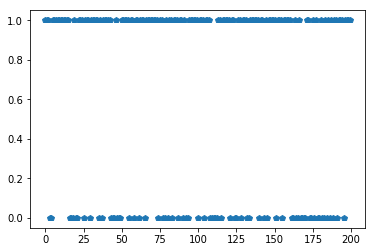

In [30]:
import matplotlib.pyplot as plt
plt.plot(y_pred, "p")

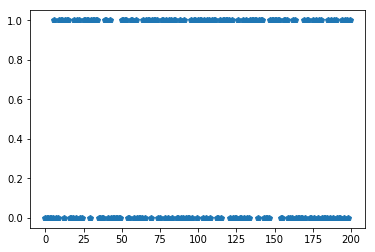

In [31]:
plt.plot(y_test, "p")

## Making the confusion Matrix

A confusion matrix is a table that is often used to describe the performance of a classification model (or "classifier") on a set of test data for which the true values are known.<br>
Key matrix elements are:<br>
true positives (TP): These are cases in which we predicted yes (they have the purchased), and they do have the purchases.<br>
true negatives (TN): We predicted no, and they don't have purchased.<br>
false positives (FP): We predicted yes, but they have actually not the purchased. (Also known as a "Type I error.")<br>
false negatives (FN): We predicted no, but they actually ourchased. (Also known as a "Type II error.")<br>

### Defining confusion matrix function

In [32]:
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

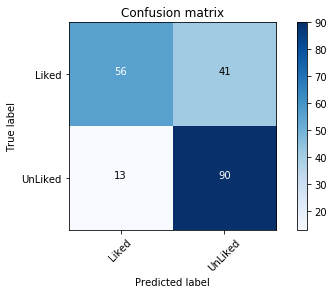

In [33]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plot_confusion_matrix(cm, classes=['Liked', 'UnLiked'])

Correct predictions=87+57 <br>
Incorrect predictions=46+10

## Checking accuracy score

In [34]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test, y_pred)

0.73

In [35]:
from sklearn.metrics import classification_report

In [36]:
print (classification_report(y_test, y_pred))

             precision    recall  f1-score   support

          0       0.81      0.58      0.67        97
          1       0.69      0.87      0.77       103

avg / total       0.75      0.73      0.72       200



# Part 2: Sentiment Analysis for customer's behavior

In [37]:
import nltk
from nltk.sentiment.vader import SentimentIntensityAnalyzer
from nltk.sentiment.util import *
from nltk import tokenize

### checking most common words used

In [38]:
from wordcloud import WordCloud, STOPWORDS

In [39]:
stopwords=set(STOPWORDS)

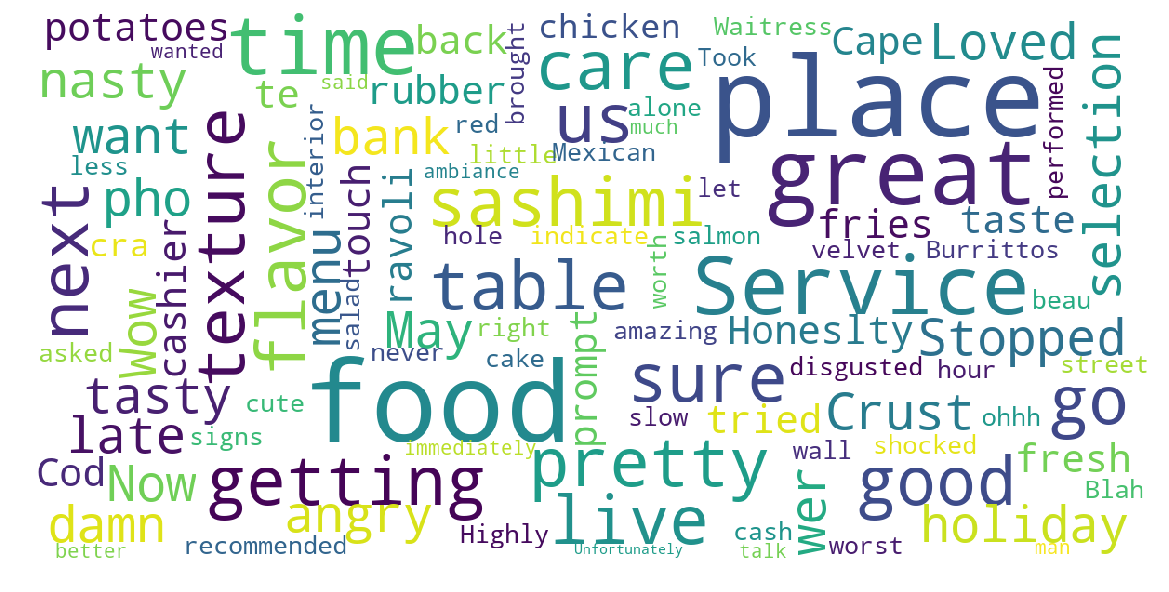

In [40]:
def Mywordcloud (data, title=None):
    wordcloud=WordCloud(
    background_color='white',
    stopwords=stopwords,
    max_words= 100 ,
    max_font_size=40 ,
    scale=3,
    random_state=1
    ).generate(str(data))
    
    fig=plt.figure(1 , figsize(20, 20))
    plt.axis('off')
    if title:
        fig.suptitle(title, fontsize=20)
        fig.subplots_adjust(top=2.3)
    
    plt.imshow(wordcloud)
    plt.show()

Mywordcloud(dataset["Review"].dropna())

**Using vader lexicon for sentiment analysis**

In [41]:
#nltk.download('vader_lexicon')

In [42]:
plt.rcParams['figure.figsize'] = (6.0, 6.0)
sid= SentimentIntensityAnalyzer()

In [43]:
dataset['Sent_compound_Polarity'] = dataset.Review.apply(lambda x:sid.polarity_scores(x)['compound'])
dataset['Sent_type']=''

In [44]:
dataset.head()

,Review,Liked,Sent_compound_Polarity,Sent_type
0,Wow... Loved this place.,1,0.5994,
1,Crust is not good.,0,-0.3412,
2,Not tasty and the texture was just nasty.,0,-0.5574,
3,Stopped by during the late May bank holiday of...,1,0.6908,
4,The selection on the menu was great and so wer...,1,0.6249,


In [45]:
dataset.loc[dataset.Sent_compound_Polarity > 0, 'Sent_type']= 'Positive'

dataset.loc[dataset.Sent_compound_Polarity == 0, 'Sent_type']= 'Neutral'

dataset.loc[dataset.Sent_compound_Polarity < 0, 'Sent_type']= 'Negative'

In [46]:
dataset.head()

,Review,Liked,Sent_compound_Polarity,Sent_type
0,Wow... Loved this place.,1,0.5994,Positive
1,Crust is not good.,0,-0.3412,Negative
2,Not tasty and the texture was just nasty.,0,-0.5574,Negative
3,Stopped by during the late May bank holiday of...,1,0.6908,Positive
4,The selection on the menu was great and so wer...,1,0.6249,Positive


In [47]:
tweets_sentiment=dataset.Sent_type.value_counts()
tweets_sentiment

Positive    500
Negative    257
Neutral     243
Name: Sent_type, dtype: int64

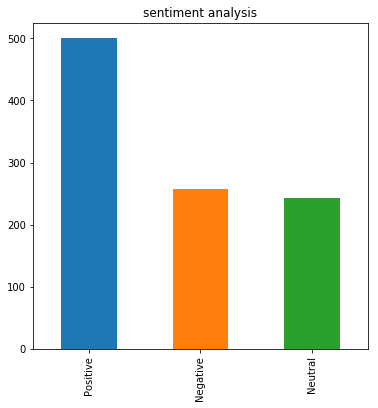

In [48]:
dataset.Sent_type.value_counts().plot (kind='bar' , title="sentiment analysis")